In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/"MyDrive/Machine Learning"

/content/drive/MyDrive/Machine Learning


In [ ]:
ls

ex2data1.txt  ex2data2.txt  naivebayes.csv  train.csv  upload_DJIA_table.csv


In [ ]:
columnname=['X','Y','Z']
df=pd.read_csv("upload_DJIA_table.csv")
print(df)

            Date          Open          High           Low         Close  \
0     2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   
1     2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234   
2     2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688   
3     2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703   
4     2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234   
...          ...           ...           ...           ...           ...   
1984  2008-08-14  11532.070312  11718.280273  11450.889648  11615.929688   
1985  2008-08-13  11632.809570  11633.780273  11453.339844  11532.959961   
1986  2008-08-12  11781.700195  11782.349609  11601.519531  11642.469727   
1987  2008-08-11  11729.669922  11867.110352  11675.530273  11782.349609   
1988  2008-08-08  11432.089844  11759.959961  11388.040039  11734.320312   

         Volume     Adj Close  
0      82160000  17949.369141  
1     133030000  17929.

In [ ]:
df.index = pd.to_datetime(df['Date'])
df
  


,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2016-07-01,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [ ]:
# drop The original date column
df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727


In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
  
# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X

,Open-Close,High-Low
Date,,
2016-07-01,-25.128907,85.470703
2016-06-30,-217.230468,218.808594
2016-06-29,-238.660157,248.490235
2016-06-28,-219.210937,219.210937
2016-06-27,214.970704,292.130860
...,...,...
2008-08-14,-83.859376,267.390625
2008-08-13,99.849609,180.440429
2008-08-12,139.230468,180.830078


In [ ]:
# Target variables
#Pandas dataframe.shift() function Shift index by desired number of periods with an optional time freq.
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
split_percentage = 0.75
split = int(split_percentage*len(df))
  
# Train data set
X_train = X[:split]
y_train = y[:split]
  
# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
#df['Predicted_Signal'] = cls.predict(X)
y_pred = cls.predict(X_test)

In [ ]:
#y_pred=df.Predicted_Signal
y_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
accuracy_score(y_test, y_pred)

0.9879518072289156

In [ ]:
#Calculate Daily returns Strategy returns Cumulative Returns 
df['Return'] = df.Close.pct_change()
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Volume,Adj Close,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,85.470703,0,NaN,NaN,NaN
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-217.230468,218.808594,0,-0.001080,-0.000000,-0.001080
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-238.660157,248.490235,0,-0.013124,-0.000000,-0.014203
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-219.210937,219.210937,0,-0.016104,-0.000000,-0.030308
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,214.970704,292.130860,1,-0.015479,-0.000000,-0.045786
...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,-83.859376,267.390625,0,-0.003771,-0.000000,-0.276361
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,99.849609,180.440429,1,-0.007143,-0.000000,-0.283504
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,139.230468,180.830078,1,0.009495,0.009495,-0.274008


In [ ]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Volume,Adj Close,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,-25.128907,85.470703,0,NaN,NaN,NaN,NaN
2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,-217.230468,218.808594,0,-0.001080,-0.000000,-0.001080,0.000000
2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,-238.660157,248.490235,0,-0.013124,-0.000000,-0.014203,0.000000
2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,-219.210937,219.210937,0,-0.016104,-0.000000,-0.030308,0.000000
2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,214.970704,292.130860,1,-0.015479,-0.000000,-0.045786,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,-83.859376,267.390625,0,-0.003771,-0.000000,-0.276361,7.656820
2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,99.849609,180.440429,1,-0.007143,-0.000000,-0.283504,7.656820
2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,139.230468,180.830078,1,0.009495,0.009495,-0.274008,7.666315


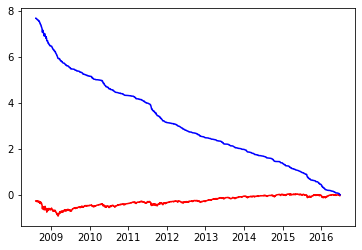

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')